# ECE 253 Homework 2
#### Name: Sheng-Wei Chang
#### PID:  A53317226

Academic Integrity Policy: Integrity of scholarship is essential for an academic community. The University expects that both faculty and students will honor this principle and in so doing protect the validity of University intellectual work. For students, this means that all academic work will be done by the individual to whom it is assigned, without unauthorized aid of any kind. By including this in my report, I agree to abide by the Academic Integrity Policy mentioned above.

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import skimage.morphology as skm
import scipy
from lloyd_python import lloyds

## Problem 1. Adaptive Histogram Equalization

In [2]:
def AHE(img, win_size):
    pad = np.pad(img, (win_size//2), 'symmetric')
    output = np.zeros_like(img)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            rank = np.zeros((win_size, win_size), dtype='int')
            window = pad[x:x+win_size, y:y+win_size]
            rank = np.where(img[x,y] > window, 1, 0)
            output[x, y] = np.sum(rank)*255//(win_size**2)
    return output

# in for loop (very slow)
# def AHE(image, win_size):
#     pad = np.pad(image, (win_size//2), 'symmetric')
#     output = np.zeros_like(image)
#     for x in range(image.shape[0]):
#         for y in range(image.shape[1]):
#             rank = 0
#             for i in range(x, x+win_size):
#                 for j in range(y, y+win_size):
#                     if image[x, y] > pad[i, j]:
#                         rank += 1
#             output[x, y] = rank*255//(win_size**2)     
#     return output

In [3]:
# Read image
img = cv2.imread('images/beach.png')

# Convert the image into grayscale before doing histogram equalization
beach = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Histogram equalization
beach_AHE_33 = AHE(beach, 33)
beach_AHE_65 = AHE(beach, 65)
beach_AHE_129 = AHE(beach, 129)
beach_HE = cv2.equalizeHist(beach)

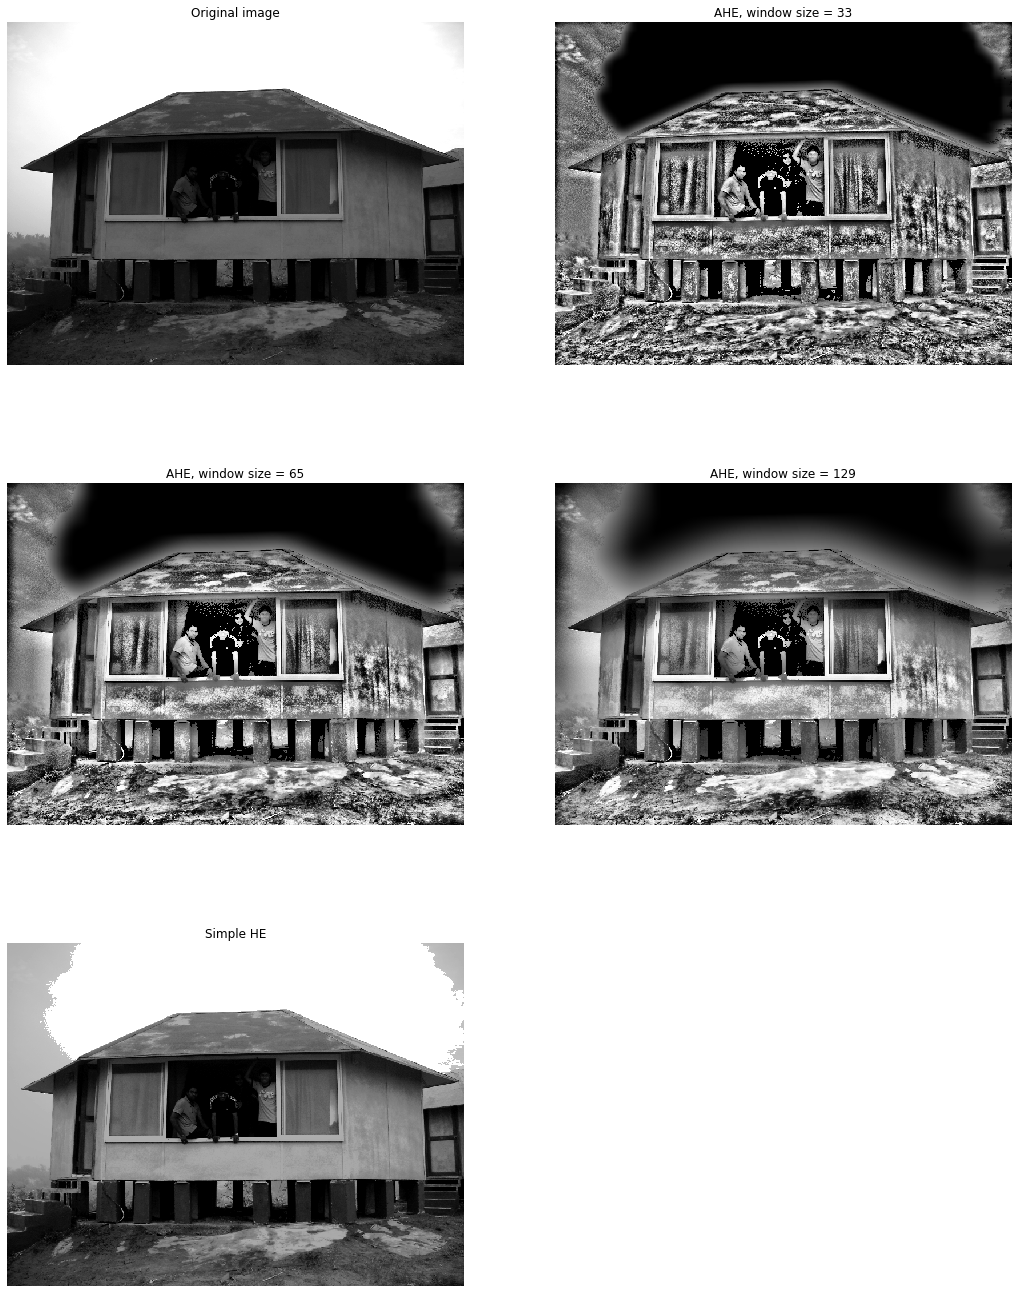

In [4]:
# Plot
plt.figure(figsize=(18,24))

plt.subplot(3,2,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(beach, cmap='gray')

plt.subplot(3,2,2)
plt.title('AHE, window size = 33')
plt.axis('off')
plt.imshow(beach_AHE_33, cmap='gray')

plt.subplot(3,2,3)
plt.title('AHE, window size = 65')
plt.axis('off')
plt.imshow(beach_AHE_65, cmap='gray')

plt.subplot(3,2,4)
plt.title('AHE, window size = 129')
plt.axis('off')
plt.imshow(beach_AHE_129, cmap='gray')

plt.subplot(3,2,5)
plt.title('Simple HE')
plt.axis('off')
plt.imshow(beach_HE, cmap='gray')

plt.show()

#### How does the original image qualitatively compare to the images after AHE and HE respectively?

The images after AHE have more details. With smaller window sizes, the details are more visible. Also, because the colors of the sky in the original image are uniform, there is no distribution of pixels to make the result better. Thus, all three AHE results, the skies become dark. As for the image after HE, it's brighter than the original image, and some areas which are too dark in the original image also get more visible. The only problem is that the colors of the sky become non-progressive.

#### Which strategy (AHE or HE) works best for beach.png and why? Is this true for any image in general?

For beach.png, I think HE works better. For beach.png, I think HE works better. Even though the images after AHE show more detail, the colors of the sky after AHE are too odd. However, in general, if the image doesn't include too many uniform regions, then I think the result after AHE will be better than that after HE. They will show more details.

## Problem 2. Binary Morphology

In [5]:
# Read image
img = cv2.imread('images/circles_lines.jpg')

# Convert the image into grayscale before doing histogram equalization
cl = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Implement opening and convert image into binary
cl_op = skm.opening(cl, selem=skm.selem.disk(4))
_, cl_op = cv2.threshold(cl_op, 128, 255, cv2.THRESH_BINARY)
print('The structuring element type and size that was used to perform the opening operation:')
print('Type: disk')
print('Size: 4')

# Connected component labeling
cl_labeled, num_features = scipy.ndimage.measurements.label(cl_op)

The structuring element type and size that was used to perform the opening operation:
Type: disk
Size: 4


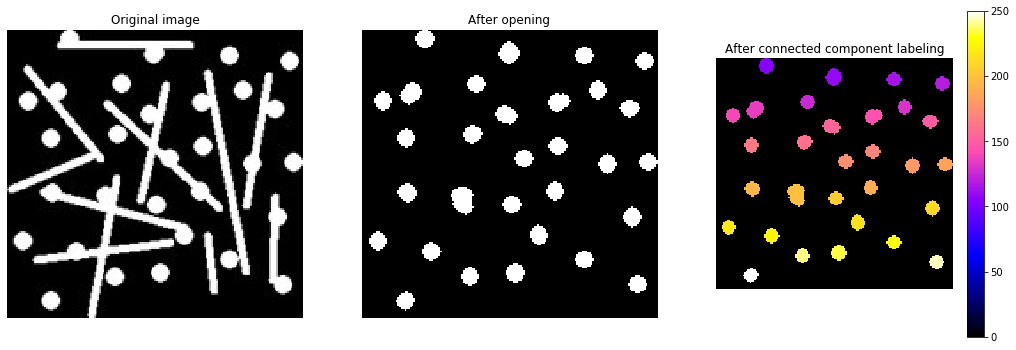

In [6]:
# Plot
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(cl, cmap='gray')

plt.subplot(1,3,2)
plt.title('After opening')
plt.axis('off')
plt.imshow(cl_op, cmap='gray')

plt.subplot(1,3,3)
plt.title('After connected component labeling')
plt.axis('off')
plt.imshow(np.where(cl_labeled>0, cl_labeled*5+100, cl_labeled), cmap='gnuplot2')
plt.colorbar()
plt.show()

In [7]:
# Properities of connected components
x = np.zeros((num_features))
y = np.zeros((num_features))
a = np.zeros((num_features))

for i in range(num_features):
    label = np.where(cl_labeled == i+1)
    x[i] = np.mean(label[1])
    y[i] = np.mean(label[0])
    a[i] = len(label[0])

df1 = pd.DataFrame({'Centroid X': x, 'Centroid Y': y, 'Area': a},  index = range(1,num_features+1))
df1

,Centroid X,Centroid Y,Area
1,35.000000,5.000000,89.0
2,82.594340,13.037736,106.0
3,125.000000,14.500000,78.0
4,159.000000,17.500000,78.0
5,64.000000,30.500000,78.0
6,132.500000,34.000000,78.0
7,27.247706,35.752294,109.0
8,11.500000,40.000000,78.0
9,110.567010,40.701031,97.0
10,150.500000,44.225000,80.0


In [8]:
# Read image
img = cv2.imread('images/lines.jpg')

# Convert the image into grayscale before doing histogram equalization
lines = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Implement opening and convert image into binary
lines_op = skm.opening(lines, selem=skm.selem.rectangle(10,2))
_, lines_op = cv2.threshold(lines_op, 128, 255, cv2.THRESH_BINARY)
print('The structuring element type and size that was used to perform the opening operation:')
print('Type: rectangle')
print('Size: 10 x 2')

# Connected component labeling
lines_labeled, num_features = scipy.ndimage.measurements.label(lines_op)

The structuring element type and size that was used to perform the opening operation:
Type: rectangle
Size: 10 x 2


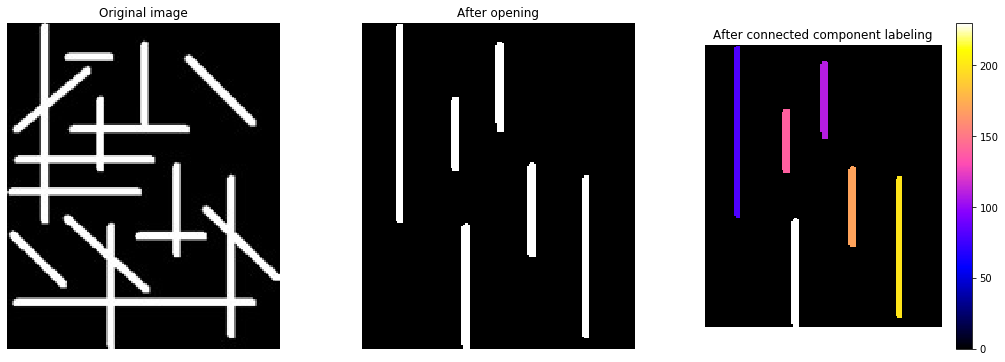

In [9]:
# Plot
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(lines, cmap='gray')

plt.subplot(1,3,2)
plt.title('After opening')
plt.axis('off')
plt.imshow(lines_op, cmap='gray')

plt.subplot(1,3,3)
plt.title('After connected component labeling')
plt.axis('off')
plt.imshow(np.where(lines_labeled>0, lines_labeled*30+50, lines_labeled), cmap='gnuplot2')
plt.colorbar()
plt.show()

In [10]:
# Properities of connected components
x = np.zeros((num_features))
y = np.zeros((num_features))
a = np.zeros((num_features))

for i in range(num_features):
    label = np.where(lines_labeled == i+1)
    x[i] = np.mean(label[1])
    y[i] = np.mean(label[0])
    a[i] = label[0].max()-label[0].min()

df2 = pd.DataFrame({'Centroid X': x, 'Centroid Y': y, 'Length': a},  index = range(1,num_features+1))
df2

,Centroid X,Centroid Y,Length
1,20.506726,56.500000,111.0
2,77.048583,35.834008,50.0
3,52.038835,62.500000,41.0
4,95.019231,105.296154,52.0
5,125.512329,131.621918,91.0
6,58.020057,148.200573,70.0


## Problem 3. Lloyd-Max Quantizer

In [11]:
def uniform_quantizer(img, s):
    assert isinstance(s, int), "invalid s"
    assert s >= 1 and s <= 7, "invalid s"
    
    q = int(256 / (2**s))
    return (np.floor(img/q) * q + q/2).astype('int')

def lloyd_max_quantizer(img, s):
    assert isinstance(s, int), "invalid s"
    assert s >= 1 and s <= 7, "invalid s"
    
    training_set = np.reshape(img, (img.shape[0]*img.shape[1], 1))
    ini_codebook = np.array([2**s])
    partition, codebook = lloyds(training_set, ini_codebook, tol=1e-7, plot_flag=False)
    
    return codebook[np.searchsorted(partition, img)].astype('int')

def MSE(img, img_q):
    return np.mean((img - img_q)**2)

In [12]:
# Read image
lena = cv2.imread('images/lena512.tif')
diver = cv2.imread('images/diver.tif')

# Convert the image into grayscale before doing histogram equalization
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
diver = cv2.cvtColor(diver, cv2.COLOR_BGR2GRAY)

# Quantization and MSE
lena_uniform = np.zeros((7, lena.shape[0], lena.shape[1]))
diver_uniform = np.zeros((7, diver.shape[0], diver.shape[1]))
lena_lloyd_max = np.zeros((7, lena.shape[0], lena.shape[1]))
diver_lloyd_max = np.zeros((7, diver.shape[0], diver.shape[1]))
lena_mse_uniform = np.zeros((7))
diver_mse_uniform = np.zeros((7))
lena_mse_lloyd_max = np.zeros((7))
diver_mse_lloyd_max = np.zeros((7))

for i in range(7):
    # result[0] = 7-bit, result[6] = 1-bit
    lena_uniform[i] = uniform_quantizer(lena, 7-i)
    diver_uniform[i] = uniform_quantizer(diver, 7-i)
    lena_lloyd_max[i] = lloyd_max_quantizer(lena, 7-i)
    diver_lloyd_max[i] = lloyd_max_quantizer(diver, 7-i)
    lena_mse_uniform[i] = MSE(lena, lena_uniform[i])
    diver_mse_uniform[i] = MSE(diver, diver_uniform[i])
    lena_mse_lloyd_max[i] = MSE(lena, lena_lloyd_max[i])
    diver_mse_lloyd_max[i] = MSE(diver, diver_lloyd_max[i])

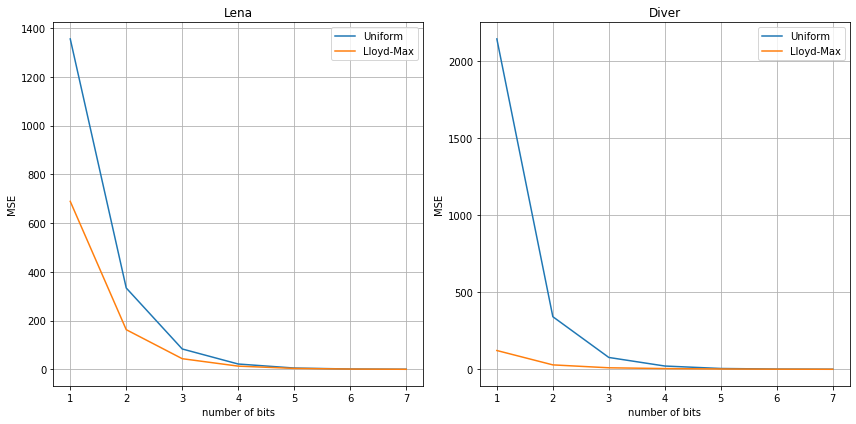

In [13]:
# Plot: MSE
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(range(7,0,-1), lena_mse_uniform, label='Uniform')
plt.plot(range(7,0,-1), lena_mse_lloyd_max, label='Lloyd-Max')
plt.xlabel('number of bits')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Lena')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(7,0,-1), diver_mse_uniform, label='Uniform')
plt.plot(range(7,0,-1), diver_mse_lloyd_max, label='Lloyd-Max')
plt.xlabel('number of bits')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Diver')
plt.legend()

plt.tight_layout()
plt.show()

#### Why does one quantizer outperform the other? 
In both images, the Lloyd-Max quantizer works better than the uniform quantizer. I think that's because the Lloyd-Max quantizer is the optimal one, optimal quantization in the squared error sense. It can choose better partitions to separate the pixel values and a better codebook to reassign. However, when the number of bits increases, both quantizers have MSE closed to zero.

#### Why is the performance gap larger for one image than for the other?
The performance gap in image *diver.tif* is larger than that in image *lena.tif*. The reason is that the histogram of *diver.tif* is more condensed. The Lloyd-Max quantizer can separate the pixel values even better. We can observe in the following images that the results of the uniform quantizer and the Lloyd-Max quantizer in *diver.tif* image are different. With the uniform quantizer, the results are pretty bad in 1-bit or 2-bit. We can't even identify the diver. However, with the Lloyd-Max quantizer, the results are better. We can identify the diver and some fishes.

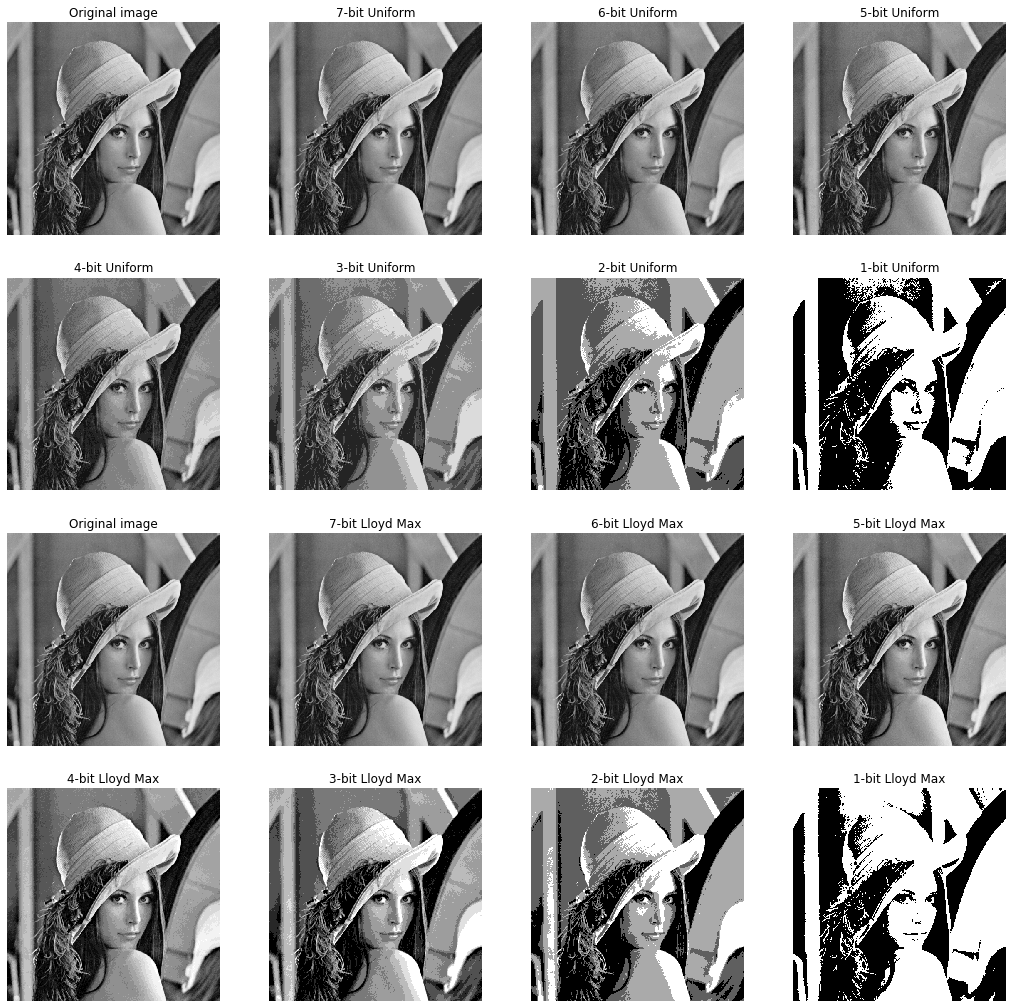

In [14]:
# Plot: lena
plt.figure(figsize=(18,18))
plt.subplot(4,4,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(lena, cmap='gray')
plt.subplot(4,4,9)
plt.title('Original image')
plt.axis('off')
plt.imshow(lena, cmap='gray')

for i in range(7):
    plt.subplot(4,4,i+2)
    plt.title('%d-bit Uniform' % (7-i))
    plt.axis('off')
    plt.imshow(lena_uniform[i], cmap='gray')
    
    plt.subplot(4,4,i+10)
    plt.title('%d-bit Lloyd Max' % (7-i))
    plt.axis('off')
    plt.imshow(lena_lloyd_max[i], cmap='gray')

plt.show()

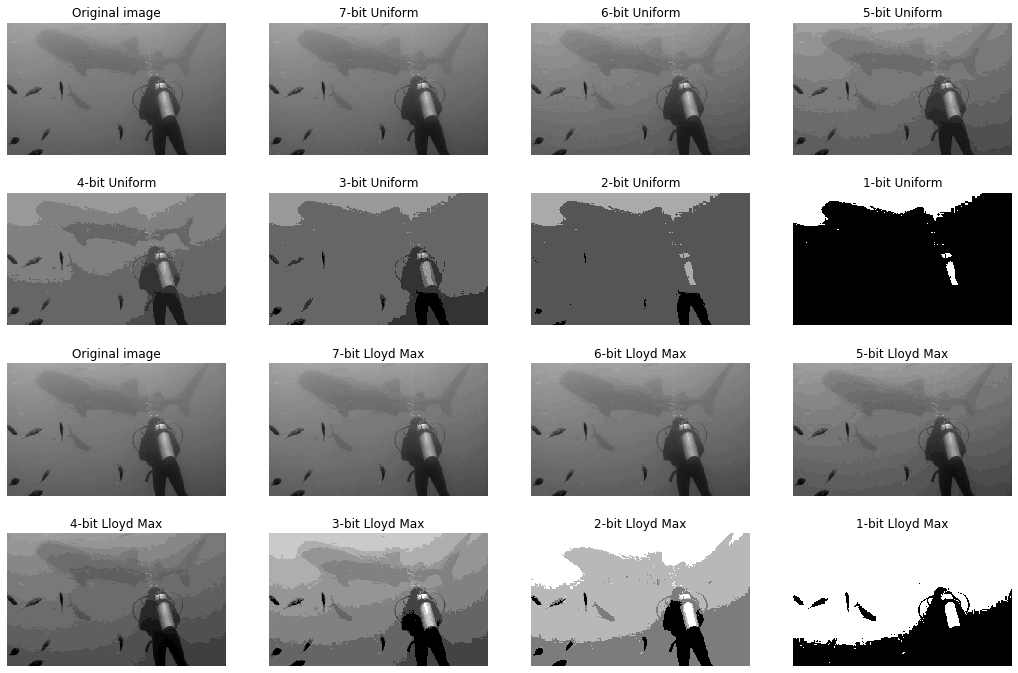

In [15]:
# Plot: diver
plt.figure(figsize=(18,12))
plt.subplot(4,4,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(diver, cmap='gray')
plt.subplot(4,4,9)
plt.title('Original image')
plt.axis('off')
plt.imshow(diver, cmap='gray')

for i in range(7):
    plt.subplot(4,4,i+2)
    plt.title('%d-bit Uniform' % (7-i))
    plt.axis('off')
    plt.imshow(diver_uniform[i], cmap='gray')
    
    plt.subplot(4,4,i+10)
    plt.title('%d-bit Lloyd Max' % (7-i))
    plt.axis('off')
    plt.imshow(diver_lloyd_max[i], cmap='gray')
    
plt.show()

In [16]:
# Histogram equalization
lena_HE = cv2.equalizeHist(lena)
diver_HE = cv2.equalizeHist(diver)

# Quantization and MSE
lena_HE_uniform = np.zeros((7, lena_HE.shape[0], lena_HE.shape[1]))
diver_HE_uniform = np.zeros((7, diver_HE.shape[0], diver_HE.shape[1]))
lena_HE_lloyd_max = np.zeros((7, lena_HE.shape[0], lena_HE.shape[1]))
diver_HE_lloyd_max = np.zeros((7, diver_HE.shape[0], diver_HE.shape[1]))
lena_HE_mse_uniform = np.zeros((7))
diver_HE_mse_uniform = np.zeros((7))
lena_HE_mse_lloyd_max = np.zeros((7))
diver_HE_mse_lloyd_max = np.zeros((7))

for i in range(7):
    # result[0] = 7-bit, result[6] = 1-bit
    lena_HE_uniform[i] = uniform_quantizer(lena_HE, 7-i)
    diver_HE_uniform[i] = uniform_quantizer(diver_HE, 7-i)
    lena_HE_lloyd_max[i] = lloyd_max_quantizer(lena_HE, 7-i)
    diver_HE_lloyd_max[i] = lloyd_max_quantizer(diver_HE, 7-i)
    lena_HE_mse_uniform[i] = MSE(lena_HE, lena_HE_uniform[i])
    diver_HE_mse_uniform[i] = MSE(diver_HE, diver_HE_uniform[i])
    lena_HE_mse_lloyd_max[i] = MSE(lena_HE, lena_HE_lloyd_max[i])
    diver_HE_mse_lloyd_max[i] = MSE(diver_HE, diver_HE_lloyd_max[i])

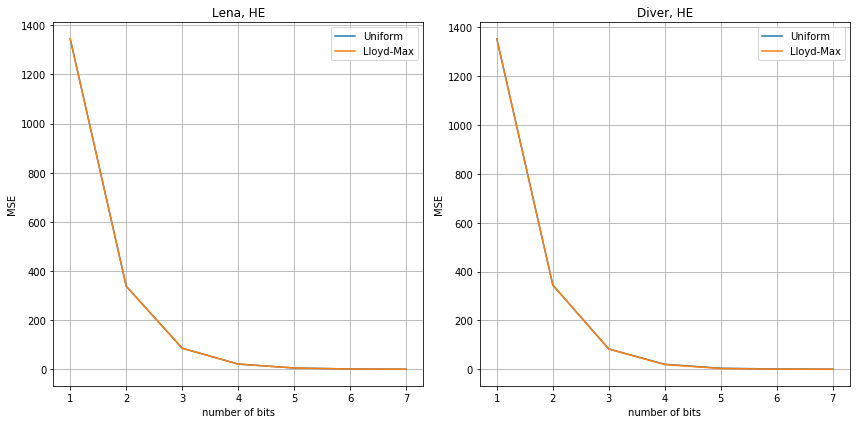

In [17]:
# Plot: MSE
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(range(7,0,-1), lena_HE_mse_uniform, label='Uniform')
plt.plot(range(7,0,-1), lena_HE_mse_lloyd_max, label='Lloyd-Max')
plt.xlabel('number of bits')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Lena, HE')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(7,0,-1), diver_HE_mse_uniform, label='Uniform')
plt.plot(range(7,0,-1), diver_HE_mse_lloyd_max, label='Lloyd-Max')
plt.xlabel('number of bits')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Diver, HE')
plt.legend()

plt.tight_layout()
plt.show()

#### Compare them with the previous set of plots. What has happened to the gap in MSE between the two quantization approaches and why?
From the plots, we can observe that two lines overlap. The gaps in MSE are pretty small for both images, *lena.tif*, and *diver.tif*. The reason is that after global histogram equalization, the partitions and the codebook of Lloyd-Max quantizer become uniform, just similar to the uniform quantizer. We can observe in the following images that the results of the uniform quantizer and Lloyd-Max quantizer are similar.

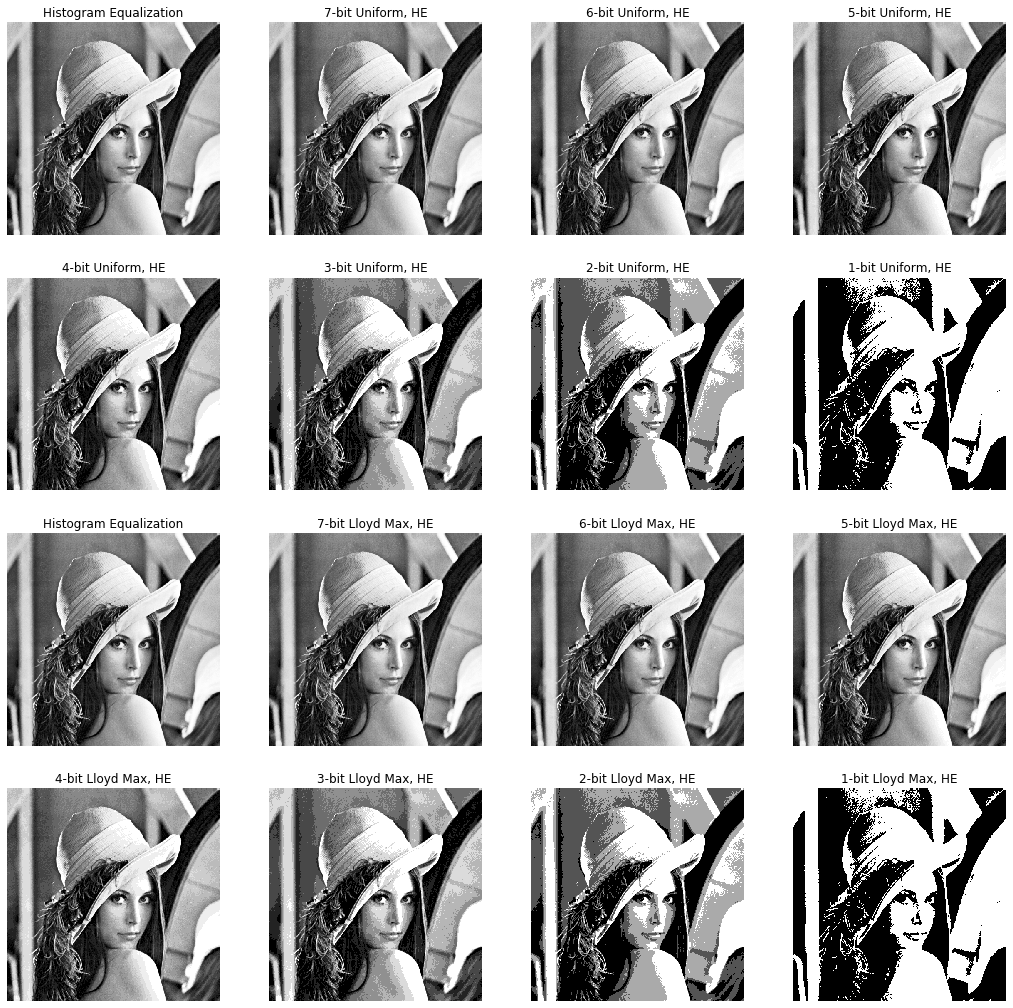

In [18]:
# Plot: lena_HE
plt.figure(figsize=(18,18))
plt.subplot(4,4,1)
plt.title('Histogram Equalization')
plt.axis('off')
plt.imshow(lena_HE, cmap='gray')
plt.subplot(4,4,9)
plt.title('Histogram Equalization')
plt.axis('off')
plt.imshow(lena_HE, cmap='gray')

for i in range(7):
    plt.subplot(4,4,i+2)
    plt.title('%d-bit Uniform, HE' % (7-i))
    plt.axis('off')
    plt.imshow(lena_HE_uniform[i], cmap='gray')
    
    plt.subplot(4,4,i+10)
    plt.title('%d-bit Lloyd Max, HE' % (7-i))
    plt.axis('off')
    plt.imshow(lena_HE_lloyd_max[i], cmap='gray')

plt.show()

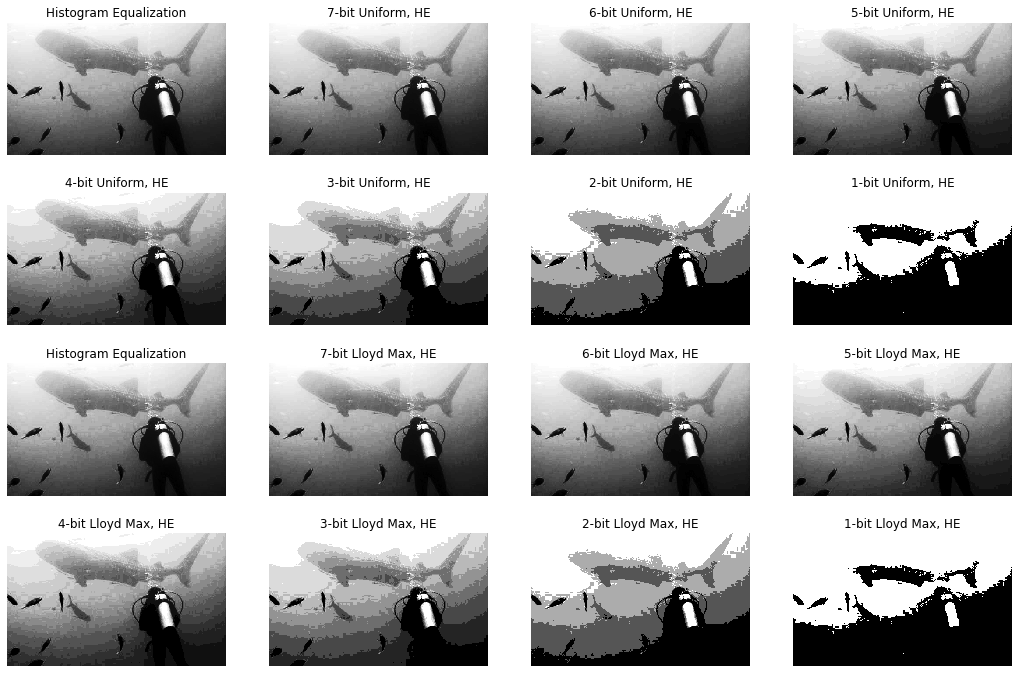

In [19]:
# Plot: diver_HE
plt.figure(figsize=(18,12))
plt.subplot(4,4,1)
plt.title('Histogram Equalization')
plt.axis('off')
plt.imshow(diver_HE, cmap='gray')
plt.subplot(4,4,9)
plt.title('Histogram Equalization')
plt.axis('off')
plt.imshow(diver_HE, cmap='gray')

for i in range(7):
    plt.subplot(4,4,i+2)
    plt.title('%d-bit Uniform, HE' % (7-i))
    plt.axis('off')
    plt.imshow(diver_HE_uniform[i], cmap='gray')
    
    plt.subplot(4,4,i+10)
    plt.title('%d-bit Lloyd Max, HE' % (7-i))
    plt.axis('off')
    plt.imshow(diver_HE_lloyd_max[i], cmap='gray')
    
plt.show()

#### Why is the MSE of the 7-bit Lloyd-Max quantizer zero or near zero for the equalized images?
For 7-bit quantized results, the number of gray levels is 128, which is quite a lot. The assigned pixel values will be a similar value to the original ones. Thus, s-t will be small and the summation of their square will also be small.

#### One might have thought that equalization is not to the advantage of the Lloyd-Max quantizer, because equalizing the histogram should be flattening the distribution, making it more uniform, which should be to the advantage of the uniform quantizer. Explain this phenomenon.
After global histogram equalization, the partitions and the codebook of the Lloyd-Max quantizer become uniform, just similar to the uniform quantizer. That is because the partitions and the codebook of the Lloyd-Max quantizer will be distributed more equally. As we know, the uniform quantizer uses totally uniform partitions and their mid-values as a codebook. Thus, flattening the histogram by global histogram equalization is a benefit for uniform quantizer. 